### Questions
- Does cholera cause dehydration?
- Is the gastric acid index correlated to feces consistency and vomit color?

## Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('cholera-dataset.csv', index_col=0)

In [3]:
df.columns

Index(['age', 'sex', 'dh', 'rbp', 'c', 'seizures', 'vc', 'ia', 'bt0', 'fc',
       'exposed_to', 'fever', 'cholera'],
      dtype='object')

In [4]:
df.shape

(303, 13)

In [5]:
df.columns = ['age', 'sex', 'dehidration', 'blood_pressure', 'cholesterol', 'seizures', 'vomit_color', 'gastric_acid',
              'blood_type', 'feces', 'exposure', 'fever', 'cholera']

In [6]:
df.head()

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [7]:
df.dtypes

age                 int64
sex                object
dehidration         int64
blood_pressure      int64
cholesterol       float64
seizures            int64
vomit_color         int64
gastric_acid        int64
blood_type          int64
feces               int64
exposure            int64
fever               int64
cholera             int64
dtype: object

In [8]:
df.isna().sum()

age               0
sex               0
dehidration       0
blood_pressure    0
cholesterol       5
seizures          0
vomit_color       0
gastric_acid      0
blood_type        0
feces             0
exposure          0
fever             0
cholera           0
dtype: int64

We will not drop the rows with missing values for cholesterol since it is not related to the questions we need to answer.

In [9]:
df[df.cholesterol.isnull()]

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
99,53,Male,2,130,NaN,1,0,173,0,2,3,0,1
134,41,Female,1,126,NaN,0,1,163,0,2,0,0,1
135,49,Female,0,130,NaN,0,1,163,0,2,0,0,1
260,66,Female,0,178,NaN,1,1,165,1,1,2,0,0
298,57,Female,0,140,NaN,0,1,123,1,1,0,0,0


In [10]:
df.describe()

,age,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
count,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [11]:
df[df.exposure == 4]

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
92,52,Male,2,138,223.0,0,1,169,0,2,4,0,1
158,58,Male,1,125,220.0,0,1,144,0,1,4,0,1
163,38,Male,2,138,175.0,0,1,173,0,2,4,0,1
164,38,Male,2,138,175.0,0,1,173,0,2,4,0,1
251,43,Male,0,132,247.0,1,0,143,1,1,4,0,0


We have 5 rows with exposure 4 which is not present in the cookbook. Since exposure is not related to our questions we will not drop them.

## Analysis for question 1
- Does cholera cause dehydration?

Creating cross table.

In [12]:
cross_tab = pd.crosstab(df.dehidration, df.cholera)

In [13]:
cross_tab = cross_tab.transpose()

Plotting heatmap for initial correlation check.

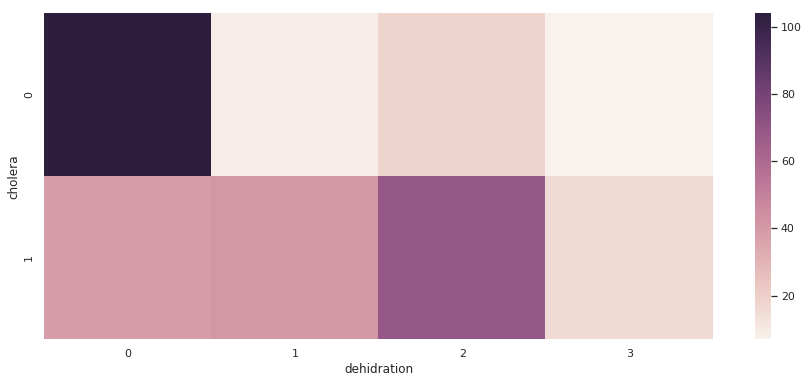

In [14]:
plt.figure(figsize=(15, 6))
sns.heatmap(cross_tab, cmap=sns.cubehelix_palette(light=.95, as_cmap=True), )

Running a chi2 test.

Since we are working with categorical variables, we can perform a chi-squared test to analyse if two variables are dependent or not. In this case, we will analyse whether dehydration level and colera are independent or not. 

`Hypotheses`: 

$H_O$: cholera and dehydration level are independent

$H_A$: cholera and dehydration level are dependent 


In [16]:
prob = 0.95
stat, p, dof, expected = stats.chi2_contingency(cross_tab)
critical = stats.chi2.ppf(prob, dof)

In [17]:
stat

81.68642755194445

In [18]:
print(f'The p-value is {p} and the critical value is {critical}')

The p-value is 1.3343043373050064e-17 and the critical value is 7.814727903251179


In this case, `alpha = 0.05`, so we are calculating a confidence interval for 95%

According to the results and based on a chi-squared distribution we can say that the confidence interval will be between 0 and 7.81. 

Then, according to the hypotheses test we can calculate the p-value. 
between
Being the p-value 1.33e-17 and the alpha=0.05 we can reject the null hypotheses, since the p-value is lower than alpha. 

Also we can compare this with the confidence intervals. 

CI = [0, 7.81]

In this case, our statistic is 81.686, and hence we are out of the confidence interval. 

With both calculations we can say that we reject the null hypotheses and we can say that cholera and dehydration are dependent variables. 

### Bar plot with subcategories

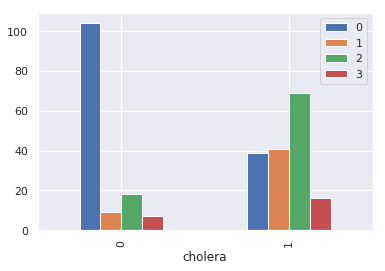

In [19]:
cross_tab.plot.bar()

plt.legend(loc='upper right')

### Question 2: Is the gastric acid index correlated to feces consistency and vomit color?

In [20]:
df.head()

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


### Gastric acid normality test

In [33]:
#cross_tab_feces_gas = pd.crosstab(df.gastric_acid, df.feces)

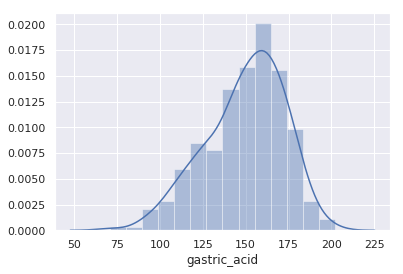

In [34]:
sns.distplot(df.gastric_acid)
plt.show()

We can see that gastic_acid follows a continuous distribution that can be represented as a normal distribution. Let's check if it follows a normal distribution.

In [26]:
stats.normaltest(df.gastric_acid)

NormaltestResult(statistic=13.46672289054534, pvalue=0.0011905243421222172)

In [36]:
stats.normaltest(df.gastric_acid.apply(np.log))

NormaltestResult(statistic=46.67072776240876, pvalue=7.338042676442715e-11)

In [39]:
stats.normaltest(df.gastric_acid**2)

NormaltestResult(statistic=5.4691653699935205, pvalue=0.06492109399814462)

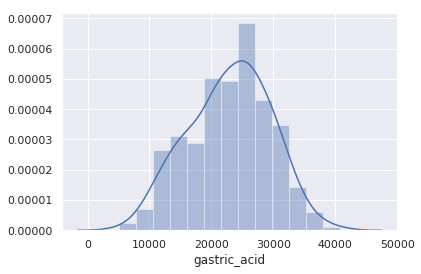

In [40]:
sns.distplot(df.gastric_acid**2)
plt.show()

we will use X^2 as variable for another test

### Gastric acid vs Feces

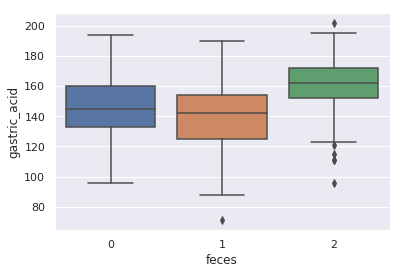

In [32]:
sns.boxplot(x="feces", y="gastric_acid", data=df)
plt.show()

In [44]:
stats.kruskal(df[df["feces"] == 0]["gastric_acid"],df[df["feces"] == 1]["gastric_acid"],df[df["feces"] == 2]["gastric_acid"])

KruskalResult(statistic=66.47584711701242, pvalue=3.672427312170281e-15)

`Hypotheses`: kruskal for gastric_acids(feces)

$H_O$: the median of gastric_acids for every group of feces are equal.

$H_A$: the median of gastric_acids for every group of feces are not equal

We rejected the null hypotheses because p-value is almost 0 and alpha being 0.05.

In [50]:
stats.f_oneway(df[df["feces"] == 0]["gastric_acid"]**2,df[df["feces"] == 1]["gastric_acid"]**2,df[df["feces"] == 2]["gastric_acid"]**2)

F_onewayResult(statistic=39.464934359948046, pvalue=6.086425330060662e-16)

`Hypotheses`: ANOVA test for gastric_acids(feces)

$H_O$: the mean of gastric_acids for every group of feces are equal.

$H_A$: the mean of gastric_acids for every group of feces are not equal

We rejected the null hypotheses because p-value is almost 0 and alpha being 0.05.

### Gastric acid vs Vomit color

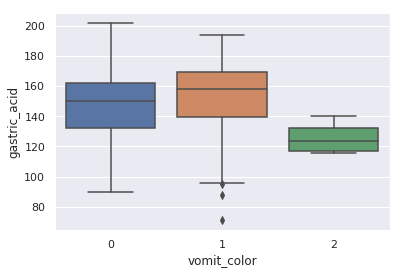

In [31]:
sns.boxplot(x="vomit_color", y="gastric_acid", data=df)
plt.show()

In [48]:
stats.kruskal(df[df["vomit_color"] == 0]["gastric_acid"],df[df["vomit_color"] == 1]["gastric_acid"],df[df["vomit_color"] == 2]["gastric_acid"])

KruskalResult(statistic=9.498540060209022, pvalue=0.00865801298577889)

`Hypotheses`: kruskal test for gastric_acids(vomit_color)

$H_O$: the median of gastric_acids for every group of feces are equal.

$H_A$: the median of gastric_acids for every group of feces are not equal

We rejected the null hypotheses because p-value is almost 0 and alpha being 0.05.

In [49]:
stats.f_oneway(df[df["vomit_color"] == 0]["gastric_acid"]**2,df[df["vomit_color"] == 1]["gastric_acid"]**2,df[df["vomit_color"] == 2]["gastric_acid"]**2)

F_onewayResult(statistic=3.7076268386265285, pvalue=0.025667067698152815)

`Hypotheses`: ANOVA test for gastric_acids(vomit_color)

$H_O$: the mean of gastric_acids for every group of feces are equal.

$H_A$: the mean of gastric_acids for every group of feces are not equal

We rejected the null hypotheses because p-value is almost 0 and alpha being 0.05.

### Logistic regression

We are considering here that dependendant variables are feces and vomits_colors while the independent is gastric_acids.
In this case we are working with categorical variables that have more than two categories. So we should apply one hot encoding method in order to create dummy variables and be able to apply the logistic regression method.